## Decision Tree on company_data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
#Load the dataset
df = pd.read_csv('Company_Data (1).csv')
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

### EDA and Data Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [5]:
df.shape

(400, 11)

In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
#convert sales column into categorical column
df['Sales'] = pd.cut(x=df['Sales'],bins=[0,6,12,17], labels=['Low', 'Medium', 'High'], right=False)
df['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

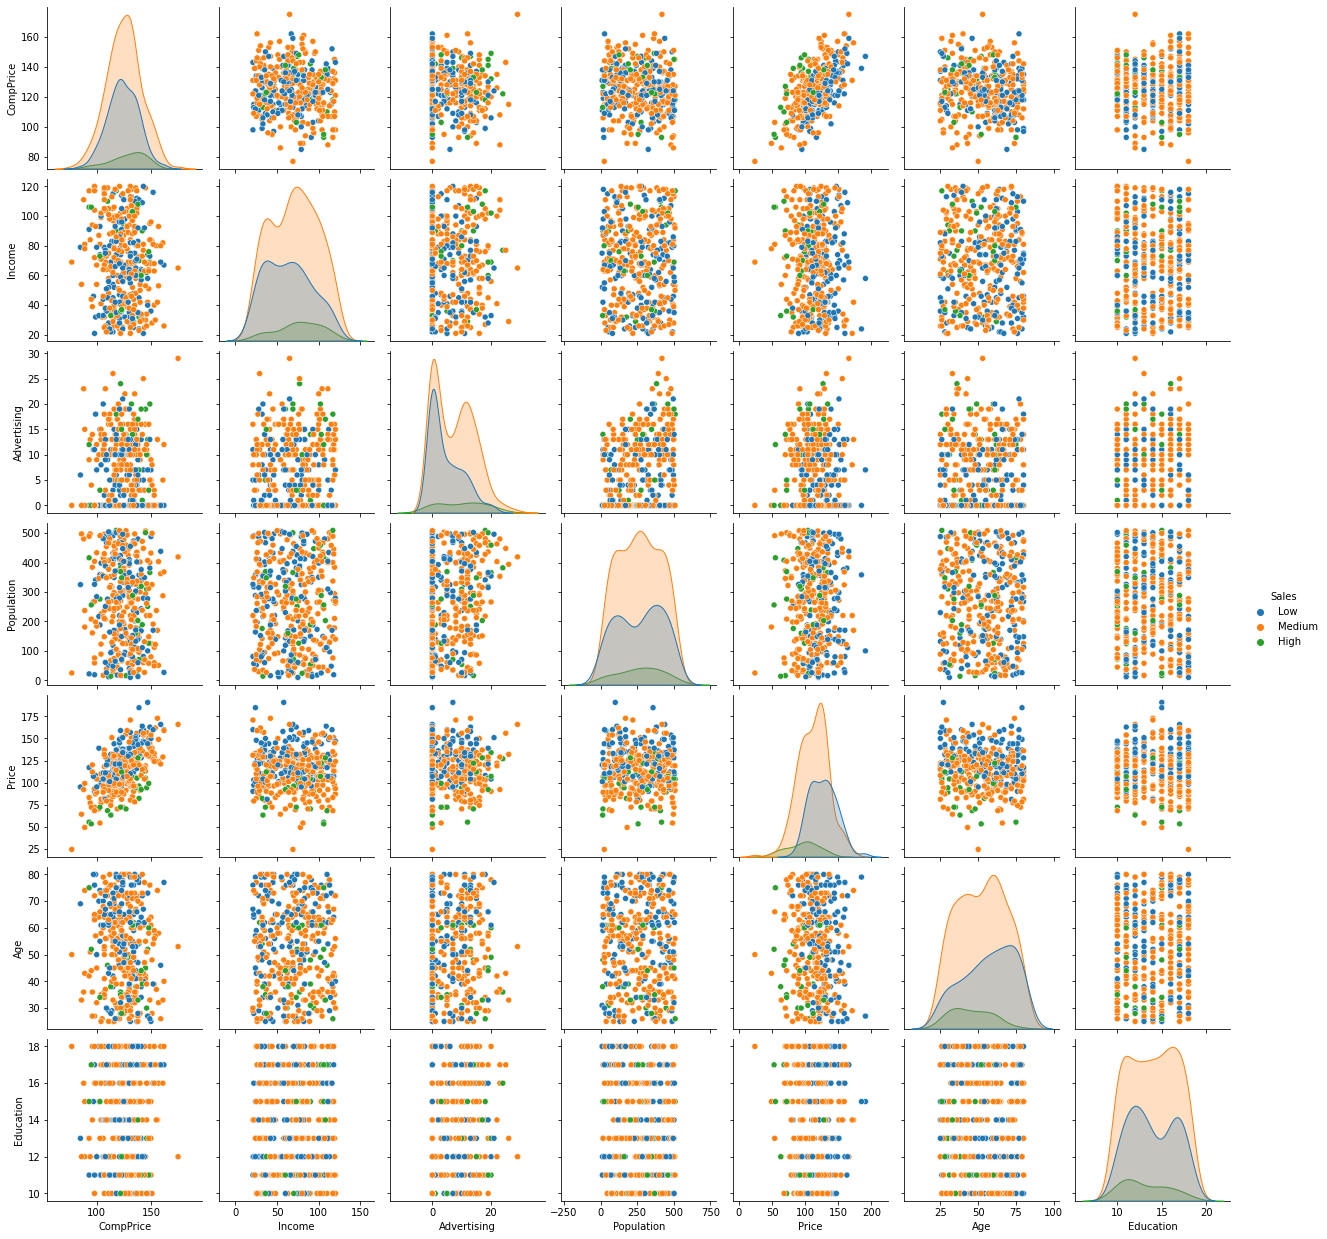

In [8]:
#paiplot for visualize attributes all at once
sns.pairplot(data=df, hue= 'Sales')

In [9]:
df['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [10]:
#convert categorical value into numeric column
label_encoder = preprocessing.LabelEncoder()

df['Sales'] = label_encoder.fit_transform(df['Sales'])
df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])

In [11]:
df

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        2        138      73           11         276    120          0   42   
1        2        111      48           16         260     83          1   65   
2        2        113      35           10         269     80          2   59   
3        2        117     100            4         466     97          2   55   
4        1        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395      0        138     108           17         203    128          1   33   
396      2        139      23            3          37    120          2   55   
397      2        162      26           12         368    159          2   40   
398      1        100      79            7         284     95          0   50   
399      2        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

In [12]:
#split the data into train data and test data
X = df.drop('Sales', axis = 1)
y = df['Sales']

In [13]:
X

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 10 columns]

In [14]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [15]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 40)

### Building Decision Tree Classifier using Entropy criteria

In [16]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

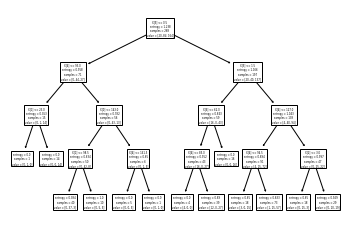

In [17]:
from sklearn import tree
#plot Decision tree
tree.plot_tree(model);

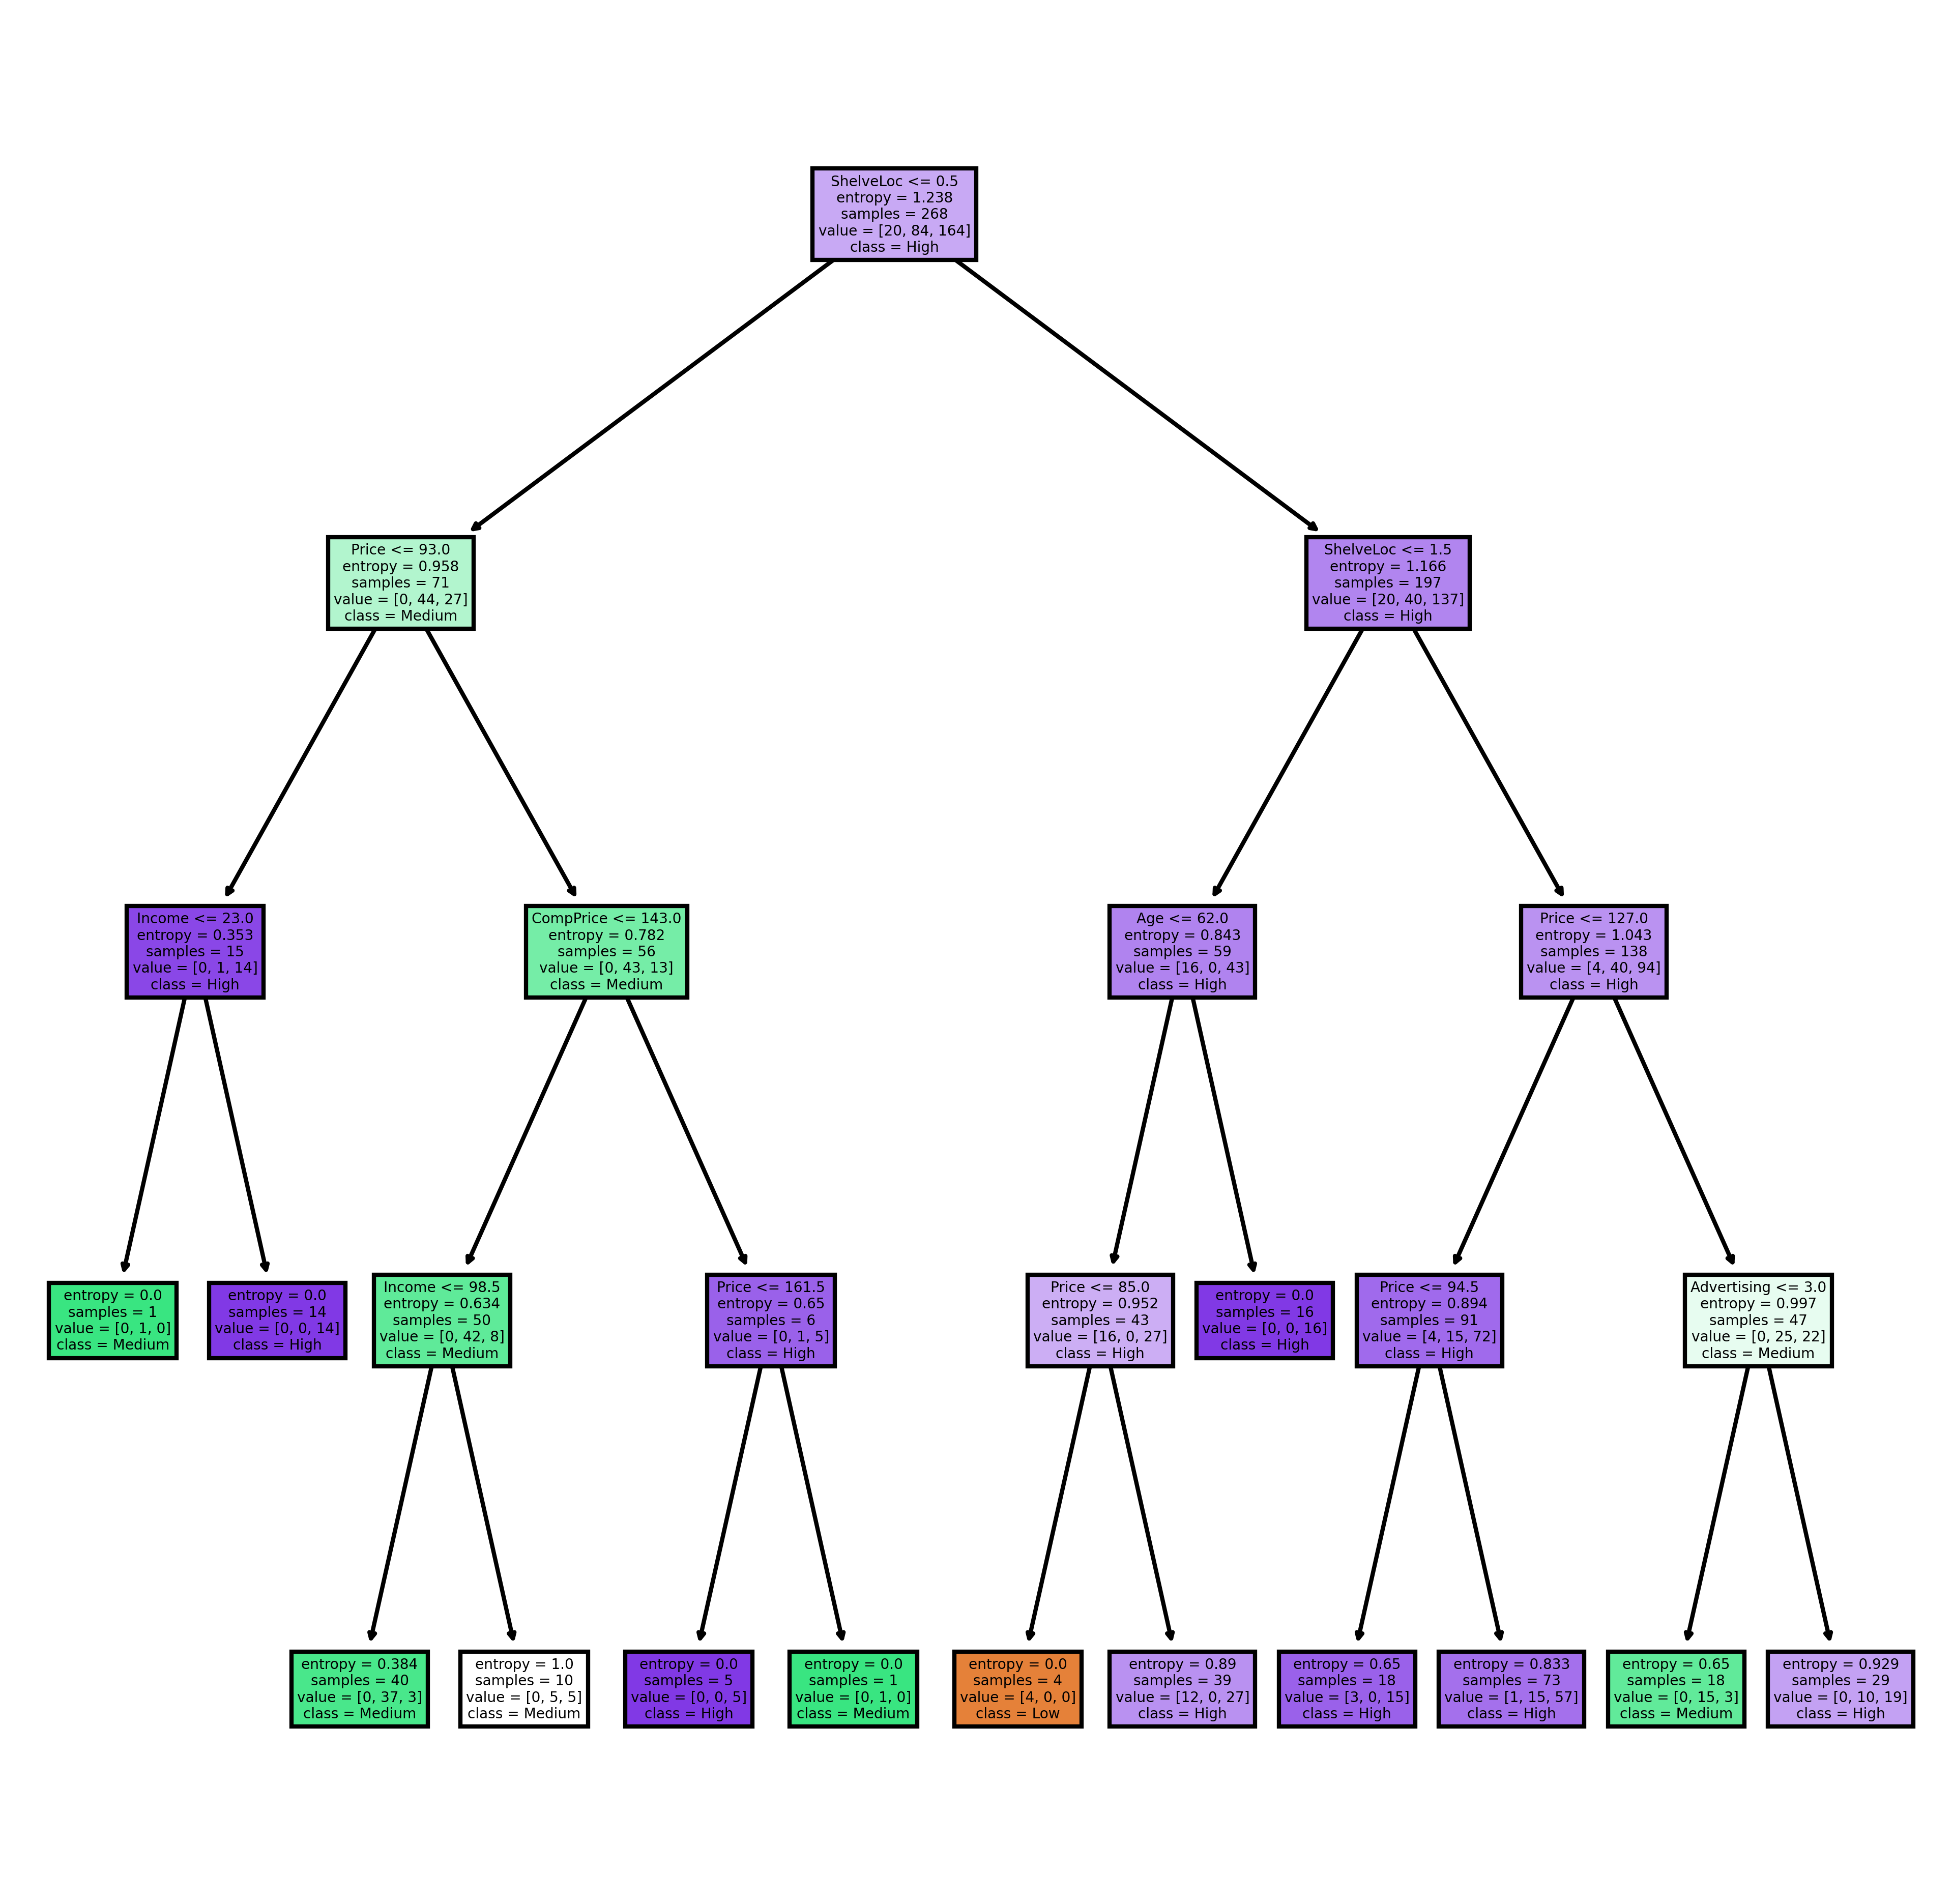

In [18]:
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education'
        'Urban', 'US',]
cn = ['Low', 'Medium', 'High']
fig,axes = plt.subplots(nrows = 1, ncols=1, figsize= (8,8), dpi=600)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

In [19]:
#predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    102
1     29
0      1
dtype: int64

In [20]:
preds

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2])

In [21]:
#getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0  0   1   2
Sales           
0      1   0   6
1      0  23  23
2      0   6  73

In [22]:
#Accuracy
np.mean(preds==y_test)

0.7348484848484849

### Building Decision Tree Classifier (CART) using Gini Criteria

In [23]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [24]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

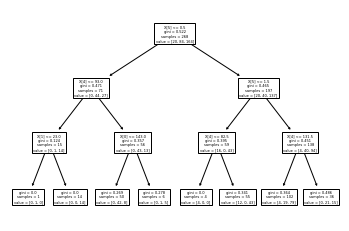

In [25]:
#Plotting decision tree
tree.plot_tree(model_gini);

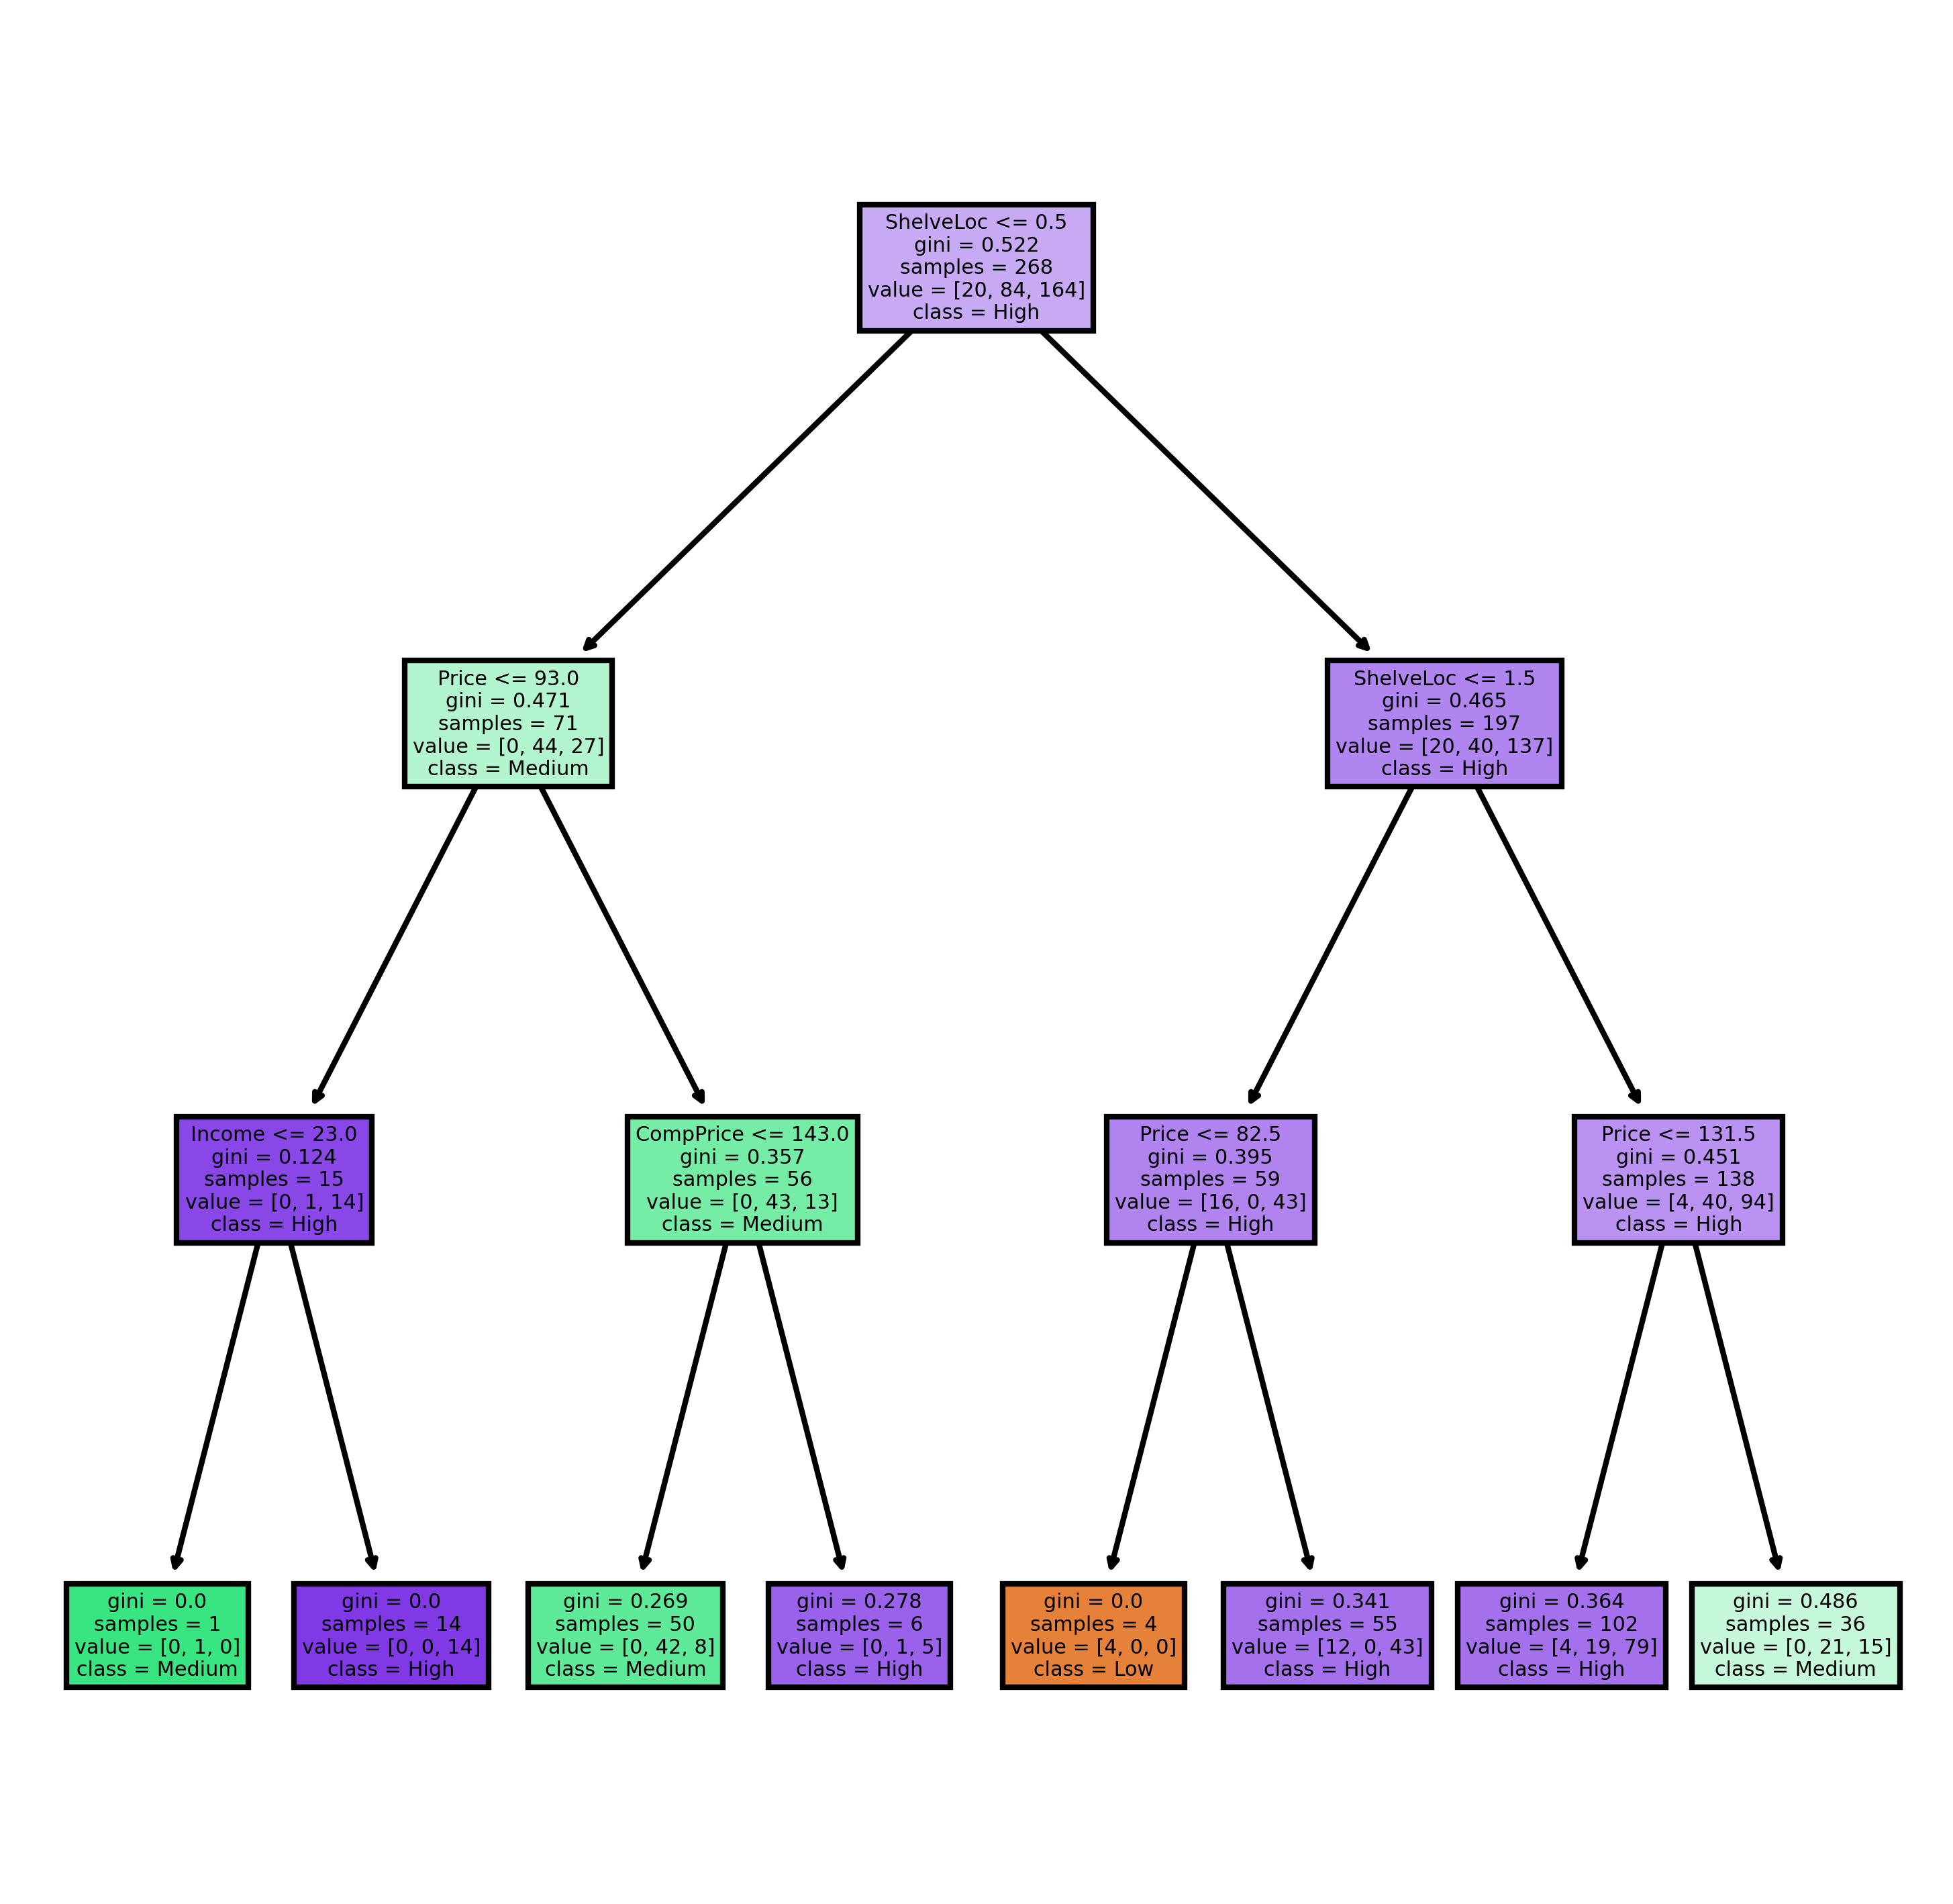

In [26]:
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education'
        'Urban', 'US',]
cn = ['Low', 'Medium', 'High']
fig,axes = plt.subplots(nrows = 1, ncols=1, figsize= (6,6), dpi=600)
tree.plot_tree(model_gini,
              feature_names = fn,
              class_names = cn,
              filled = True);

In [27]:
#Predicting on test data
pred = model_gini.predict(x_test)
pd.Series(pred).value_counts()

2    93
1    35
0     4
dtype: int64

In [28]:
pred

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2])

In [29]:
#Creating cross table for checking the model
pd.crosstab(y_test, pred)

col_0  0   1   2
Sales           
0      1   0   6
1      0  26  20
2      3   9  67

In [30]:
#Accuracy
np.mean(pred==y_test)

0.7121212121212122